# **Part 2: Regression Tree**

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

### Regression Tree Implementation

In [2]:
# Do not edit this cell
def process_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:          # process the lines to extract x and y coordinates
        x_str, y_str = line.strip().split(',')
        x = int(x_str)
        y = int(y_str)
        data.append([x, y])     # store x and y coordinates for each time step
    data = np.array(data)
    return data
#COPYING THIS FROM PREV PROVIDED CODE TO LOAD DATA

train_data = process_data('Dataset/Training/training_data.txt')
test_data = process_data('Dataset/Testing/test01.txt')

def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(data[i + look_back, :])
    return np.array(dataX), np.array(dataY)

def calculate_rmse(actual, predicted):
    return np.sqrt(np.sum((actual - predicted) ** 2, axis=1).mean())

look_back_values = [1, 2, 3]

for look_back in look_back_values:
    trainX, trainY = create_dataset(train_data, look_back)
    testX, testY = create_dataset(test_data, look_back)

    model = DecisionTreeRegressor()
    model.fit(trainX.reshape(len(trainX), -1), trainY)

    predictions = model.predict(testX.reshape(len(testX), -1))

    rmse = calculate_rmse(testY, predictions)
    print(f'Lookback: {look_back}, RMSE: {rmse}')

Lookback: 1, RMSE: 11.250490666315079
Lookback: 2, RMSE: 10.131453747422993
Lookback: 3, RMSE: 9.539625482322899


### Evaluation and Analysis

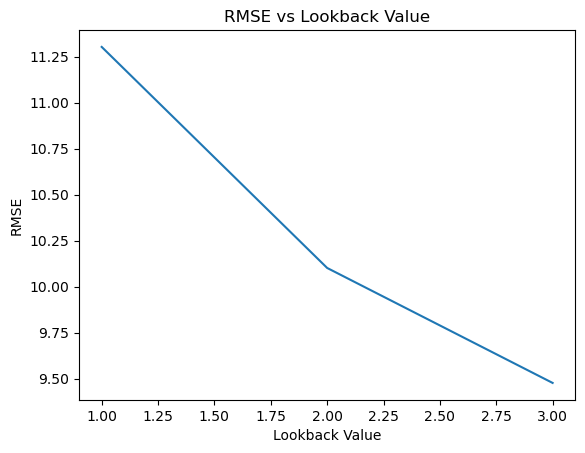

In [3]:
# look_back_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
look_back_values = [1, 2, 3]
rmse_values = []

for look_back in look_back_values:
    trainX, trainY = create_dataset(train_data, look_back)
    testX, testY = create_dataset(test_data, look_back)

    model = DecisionTreeRegressor()
    model.fit(trainX.reshape(len(trainX), -1), trainY)

    predictions = model.predict(testX.reshape(len(testX), -1))

    rmse = calculate_rmse(testY, predictions)
    rmse_values.append(rmse)

plt.plot(look_back_values, rmse_values)
plt.xlabel('Lookback Value')
plt.ylabel('RMSE')
plt.title('RMSE vs Lookback Value')
plt.show()


### Analysis
A decreasing RMSE vs Lookback graph suggests that increasing the lookback value improves the model’s performance. This indicates that the model benefits from more historical data, as it can capture longer-term trends or dependencies in the data, leading to more accurate predictions. This makes sense since the nature of our data is based on tracking the navigation trails of the micro-robots and navigation trails are continuous steps where each step's prediction can heavily benefit from the data of previous steps.

### Visualization of Actual and Predicted Path

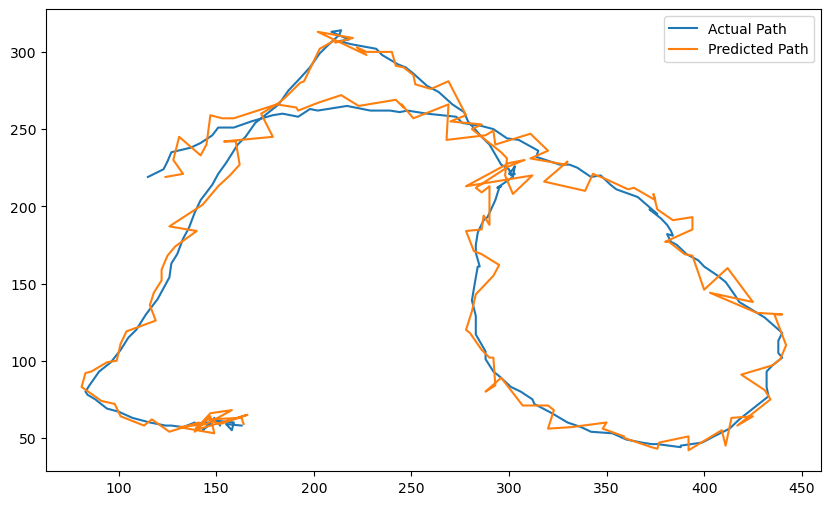

In [4]:

look_back = 3 # choose the lookback value that gave the lowest RMSE

trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

model = DecisionTreeRegressor()
model.fit(trainX.reshape(len(trainX), -1), trainY)

#6 second interval
start_time = 9
end_time = 15

start_index = start_time * 30  # 30 fps
end_index = end_time * 30

actual_path = testY[start_index:end_index]

predicted_path = model.predict(testX[start_index:end_index].reshape(-1, 2*look_back))

plt.figure(figsize=(10, 6))
plt.plot(actual_path[:, 0], actual_path[:, 1], label='Actual Path')
plt.plot(predicted_path[:, 0], predicted_path[:, 1], label='Predicted Path')
plt.legend()
plt.show()
